# Assessment: Comcast Telecom Consumer Complaints

In [1]:
#import required python libaries

import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
comcast_df = pd.read_csv('Comcast_telecom_complaints_data.csv',index_col=0)

In [3]:
# Check if the dataframe was created successfully
comcast_df.head()

Customer Complaint      Date  \
Ticket #                                                                
250635                        Comcast Cable Internet Speeds  22-04-15   
223441         Payment disappear - service got disconnected  04-08-15   
242732                                    Speed and Service  18-04-15   
277946    Comcast Imposed a New Usage Cap of 300GB that ...  05-07-15   
307175           Comcast not working and no service to boot  26-05-15   

         Date_month_year         Time        Received Via      City     State  \
Ticket #                                                                        
250635         22-Apr-15   3:53:50 PM  Customer Care Call  Abingdon  Maryland   
223441         04-Aug-15  10:22:56 AM            Internet   Acworth   Georgia   
242732         18-Apr-15   9:55:47 AM            Internet   Acworth   Georgia   
277946         05-Jul-15  11:59:35 AM            Internet   Acworth   Georgia   
307175         26-May-15   1:25:26 PM            Internet   Acworth   Georgia   

          Zip code  Status Filing on Behalf of Someone  
Ticket #                                                
250635       21009  Closed                          No  
223441       30102  Closed                          No  
242732       30101  Closed                         Yes  
277946       30101    Open                         Yes  
307175       30101  Solved                          No

In [4]:
# checking for Nulls
comcast_df[comcast_df.isnull()].count()
# no Nulls

Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [5]:
# Describe the datafame
comcast_df.describe(include='all')

Customer Complaint      Date Date_month_year        Time  \
count                2224      2224            2224        2224   
unique               1841        91              91        2190   
top               Comcast  24-06-15       24-Jun-15  3:25:33 PM   
freq                   83       218             218           2   
mean                  NaN       NaN             NaN         NaN   
std                   NaN       NaN             NaN         NaN   
min                   NaN       NaN             NaN         NaN   
25%                   NaN       NaN             NaN         NaN   
50%                   NaN       NaN             NaN         NaN   
75%                   NaN       NaN             NaN         NaN   
max                   NaN       NaN             NaN         NaN   

              Received Via     City    State      Zip code  Status  \
count                 2224     2224     2224   2224.000000    2224   
unique                   2      928       43           NaN       4   
top     Customer Care Call  Atlanta  Georgia           NaN  Solved   
freq                  1119       63      288           NaN     973   
mean                   NaN      NaN      NaN  47994.393435     NaN   
std                    NaN      NaN      NaN  28885.279427     NaN   
min                    NaN      NaN      NaN   1075.000000     NaN   
25%                    NaN      NaN      NaN  30056.500000     NaN   
50%                    NaN      NaN      NaN  37211.000000     NaN   
75%                    NaN      NaN      NaN  77058.750000     NaN   
max                    NaN      NaN      NaN  99223.000000     NaN   

       Filing on Behalf of Someone  
count                         2224  
unique                           2  
top                             No  
freq                          2021  
mean                           NaN  
std                            NaN  
min                            NaN  
25%                            NaN  
50%                            NaN  
75%                            NaN  
max                            NaN

In [6]:
# Get dataframe info
comcast_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2224 entries, 250635 to 363614
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer Complaint           2224 non-null   object
 1   Date                         2224 non-null   object
 2   Date_month_year              2224 non-null   object
 3   Time                         2224 non-null   object
 4   Received Via                 2224 non-null   object
 5   City                         2224 non-null   object
 6   State                        2224 non-null   object
 7   Zip code                     2224 non-null   int64 
 8   Status                       2224 non-null   object
 9   Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(9)
memory usage: 191.1+ KB


## 1. Provide the trend chart for the number of complaints at monthly and daily granularity levels

In [7]:
comcast_df['Date_month_year'] = pd.to_datetime(comcast_df['Date_month_year'])
comcast_df['Created_Month'] =  comcast_df['Date_month_year'].apply(lambda x: x.month)
comcast_df['Created_Day'] = comcast_df['Date_month_year'].apply(lambda x: x.day)
comcast_df['Created_Day_Of_Week'] = comcast_df['Date_month_year'].apply(lambda x: x.dayofweek)

In [8]:
data_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
comcast_df['Created_Day_Of_Week']=comcast_df['Created_Day_Of_Week'].map(data_map)
comcast_df.head()

Customer Complaint      Date  \
Ticket #                                                                
250635                        Comcast Cable Internet Speeds  22-04-15   
223441         Payment disappear - service got disconnected  04-08-15   
242732                                    Speed and Service  18-04-15   
277946    Comcast Imposed a New Usage Cap of 300GB that ...  05-07-15   
307175           Comcast not working and no service to boot  26-05-15   

         Date_month_year         Time        Received Via      City     State  \
Ticket #                                                                        
250635        2015-04-22   3:53:50 PM  Customer Care Call  Abingdon  Maryland   
223441        2015-08-04  10:22:56 AM            Internet   Acworth   Georgia   
242732        2015-04-18   9:55:47 AM            Internet   Acworth   Georgia   
277946        2015-07-05  11:59:35 AM            Internet   Acworth   Georgia   
307175        2015-05-26   1:25:26 PM            Internet   Acworth   Georgia   

          Zip code  Status Filing on Behalf of Someone  Created_Month  \
Ticket #                                                                
250635       21009  Closed                          No              4   
223441       30102  Closed                          No              8   
242732       30101  Closed                         Yes              4   
277946       30101    Open                         Yes              7   
307175       30101  Solved                          No              5   

          Created_Day Created_Day_Of_Week  
Ticket #                                   
250635             22                 Wed  
223441              4                 Tue  
242732             18                 Sat  
277946              5                 Sun  
307175             26                 Tue

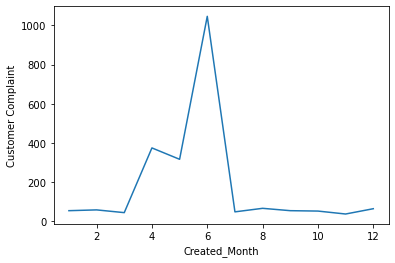

In [9]:
# Plotting no.of complaint for monthly
monthly_data = comcast_df.groupby('Created_Month').count().reset_index()
month_plot = sns.lineplot(x='Created_Month', y= 'Customer Complaint', data = monthly_data)
ax = month_plot.axes

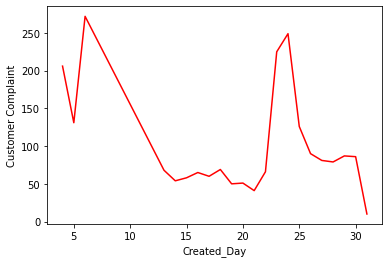

In [10]:
# Plotting no.of complaint for daily
day_data = comcast_df.groupby('Created_Day').count().reset_index()
day_plot = sns.lineplot(x='Created_Day', y= 'Customer Complaint', data = day_data, color = 'red')
ax = day_plot.axes

<AxesSubplot:xlabel='Created_Day_Of_Week', ylabel='count'>

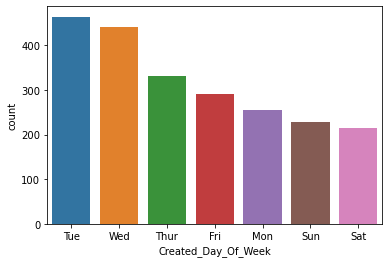

In [11]:
# number of complaints based on created day of the week
sns.countplot(x='Created_Day_Of_Week', data = comcast_df, order=comcast_df['Created_Day_Of_Week'].value_counts().index)


## 2. Provide a table with the frequency of complaint types.

In [12]:
comcast_df['Customer Complaint'] = comcast_df['Customer Complaint'].str.title() 
CT_freq = comcast_df['Customer Complaint'].value_counts()
CT_freq

Comcast                                                                                    102
Comcast Data Cap                                                                            30
Comcast Internet                                                                            29
Comcast Data Caps                                                                           21
Comcast Billing                                                                             18
                                                                                          ... 
Comcast Service And Customer Service Issues                                                  1
Comcast - Incorrect Billing Issues - Has Happened On Multiple Occasions With My Account      1
Comcast Blocking Hbo Content For Streaming.                                                  1
Recurring Billing Discrepancy Regarding Modem                                                1
Comcast Forcing Me To Purchase Cable Tv, Only Want

## 3. Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [14]:
comcast_df['Highlevel_Status'] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in comcast_df["Status"]]

In [16]:
comcast_df['Highlevel_Status'].unique()

array(['Closed', 'Open'], dtype=object)

## 4. Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.

In [17]:
comcast_df['State'] = comcast_df['State'].str.title()
states_cmp = comcast_df.groupby(['State','Highlevel_Status']).size().unstack().fillna(0)

In [18]:
states_cmp

Highlevel_Status      Closed  Open
State                             
Alabama                 17.0   9.0
Arizona                 14.0   6.0
Arkansas                 6.0   0.0
California             159.0  61.0
Colorado                58.0  22.0
Connecticut              9.0   3.0
Delaware                 8.0   4.0
District Of Columbia    15.0   2.0
Florida                201.0  39.0
Georgia                208.0  80.0
Illinois               135.0  29.0
Indiana                 50.0   9.0
Iowa                     1.0   0.0
Kansas                   1.0   1.0
Kentucky                 4.0   3.0
Louisiana               12.0   1.0
Maine                    3.0   2.0
Maryland                63.0  15.0
Massachusetts           50.0  11.0
Michigan                92.0  23.0
Minnesota               29.0   4.0
Mississippi             23.0  16.0
Missouri                 3.0   1.0
Montana                  1.0   0.0
Nevada                   1.0   0.0
New Hampshire            8.0   4.0
New Jersey              56.0  19.0
New Mexico              11.0   4.0
New York                 6.0   0.0
North Carolina           3.0   0.0
Ohio                     3.0   0.0
Oregon                  36.0  13.0
Pennsylvania           110.0  20.0
Rhode Island             1.0   0.0
South Carolina          15.0   3.0
Tennessee               96.0  47.0
Texas                   49.0  22.0
Utah                    16.0   6.0
Vermont                  2.0   1.0
Virginia                49.0  11.0
Washington              75.0  23.0
West Virginia            8.0   3.0

<AxesSubplot:ylabel='State'>

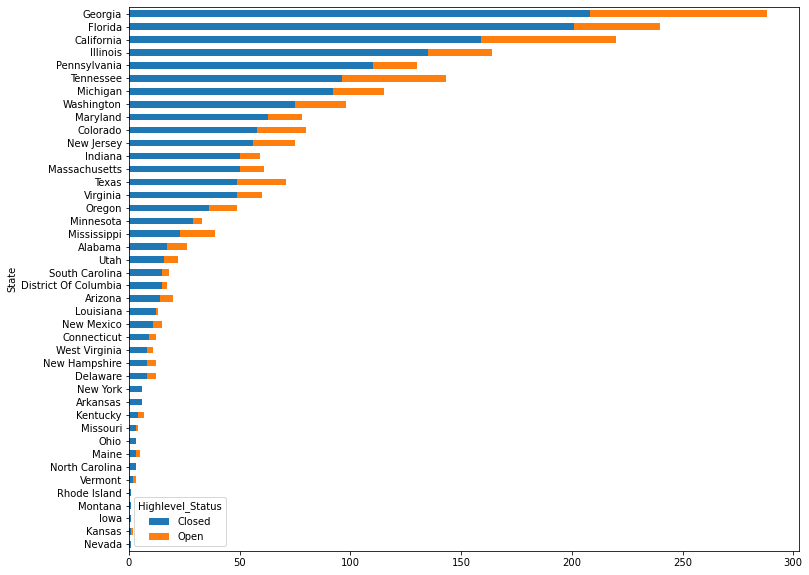

In [21]:
states_cmp.sort_values('Closed',axis = 0,ascending=True).plot(kind="barh", figsize=(12,10), stacked=True)

## 5. Which state has the maximum complaints

In [22]:
comcast_df.groupby(["State"]).size().sort_values(ascending=False).to_frame().rename({0: "ComplaintS count"}, axis=1)[:1]

ComplaintS count
State                    
Georgia               288

## 6. Which state has the highest percentage of unresolved complaints

In [23]:
CT = comcast_df.groupby(["State","Highlevel_Status"]).size().unstack().fillna(0)
CT.sort_values('Closed',axis = 0,ascending=False)[:1]

Highlevel_Status  Closed  Open
State                         
Georgia            208.0  80.0

In [26]:
#highest percentage of unresolved complaints
CT['Unresolved_cmp_prct'] = CT['Open']/CT['Open'].sum()*100

In [27]:
CT.sort_values('Unresolved_cmp_prct',axis = 0,ascending=False)[:1]

Highlevel_Status  Closed  Open  Resolved_comp_prct  Unresolved_cmp_prct
State                                                                  
Georgia            208.0  80.0            12.18512            15.473888

Georgia has highest Unresolved complaints when compared to other states 

## 7. Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls

In [29]:
comp_resolved = comcast_df.groupby(['Received Via','Highlevel_Status']).size().unstack().fillna(0)
comp_resolved['resolved'] = comp_resolved['Closed']/comp_resolved['Closed'].sum()*100
comp_resolved['resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64

# Assessment completed